<a href="https://colab.research.google.com/github/AsmaBenHmidene/Project-2/blob/main/clean_and_explore_the_data_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First choice: dataset 1
## Metabolic Syndrome:

1. Source of data

The dataset for analysis came from the NHANES initiative.
https://data.world/informatics-edu/metabolic-syndrome-prediction

2. Brief description of data

To predict metabolic syndrome, yes or not based on common risk factors.The following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model

3. What is the target?

Metabolicsyndrome

4. What does one row represent? (A person? A business? An event? A product?)

a person

5. Is this a classification or regression problem?

classification problem

6. How many features does the data have?

14 features

7. How many rows are in the dataset?

2401 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Some features might not be relevant to  the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.neighbors import KNeighborsClassifier


# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
# Load data from file structure
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/Metabolic  Syndrome.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


# Cleaning:

1. Duplicates:

In [ ]:
df.duplicated().sum()

0

No duplicates.

2. data types:

In [ ]:
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

no issue in data types.

3. impossible values in numeric columns:

In [ ]:
df.select_dtypes('number').describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [ ]:
num_columns= df.select_dtypes('number')

In [ ]:
for column in num_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

seqn : [62161 62164 62169 ... 71909 71911 71915]
Age : [22 44 21 43 51 80 26 30 70 35 57 36 28 38 62 65 77 29 50 48 61 34 52 64
 72 56 69 78 47 39 46 23 68 40 25 20 53 27 54 32 76 71 42 79 59 60 37 31
 24 73 33 55 49 63 74 58 45 41 66 67 75]
Income : [8200. 4500.  800. 2000.   nan  300. 9000. 6200. 1000. 2500. 3500. 1500.
 1600. 5400. 1700.]
WaistCirc : [ 81.   80.1  69.6 120.4  81.1 112.5  78.6  80.2   nan  99.  107.8  97.
 106.   82.7  92.9  89.   94.  118.6 120.3  90.1  97.2 136.1 111.   90.8
  78.9 104.2  95.1 112.  110.   74.6  91.9  90.  130.3  78.  104.5 103.5
  94.9 100.3  80.3 107.  106.9 110.7  98.2 103.8 104.  105.4  93.7  89.7
  88.6  94.2  67.5  85.2 108.2 119.7  87.8 125.4  94.4  82.  115.  100.1
 127.5 101.9 102.9  82.4 114.2  73.7  97.1  89.1  98.6  95.  101.2 140.6
  85.1  93.1 100.9 100.   93.6  94.7  86.9  99.3  83.3 111.5  99.9  81.4
  96.3  82.3  87.7 136.8 103.3  83.  147.3  80.   93.8 111.3  92.7 110.8
  73.2 101.8  98.9 115.3 105.9  92.6  92.2 100.2  75.5 100.8 

No issue with the numerical columns.

4. inconsistent values in categorical columns:

In [ ]:
object_columns= df.select_dtypes('object')

In [ ]:
for column in object_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

Sex : ['Male' 'Female']
Marital : ['Single' 'Married' 'Widowed' 'Divorced' nan 'Separated']
Race : ['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']
MetabolicSyndrome : ['No MetSyn' 'MetSyn']


No  issue with object columns.

5. NaN values:

In [ ]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

There are missing value in income , WaistCirc and BMI. All of them are numerical columns.
For object columns, there is missing values in column Marital.

We will use Exploratory Visualizations to determine the best imputation method for the numerical columns.

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

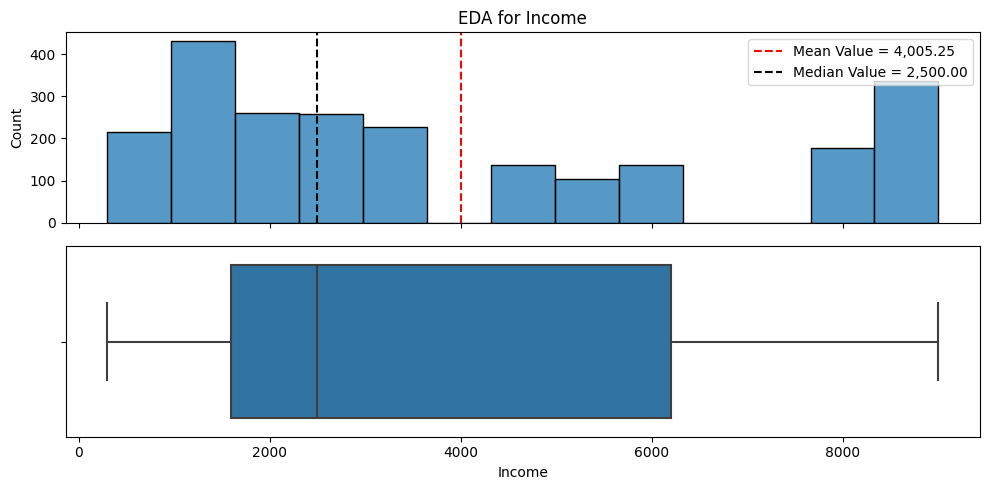

In [ ]:
plot_numeric(df,"Income")

The distribution is skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [ ]:
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Income'].isna().sum()

0

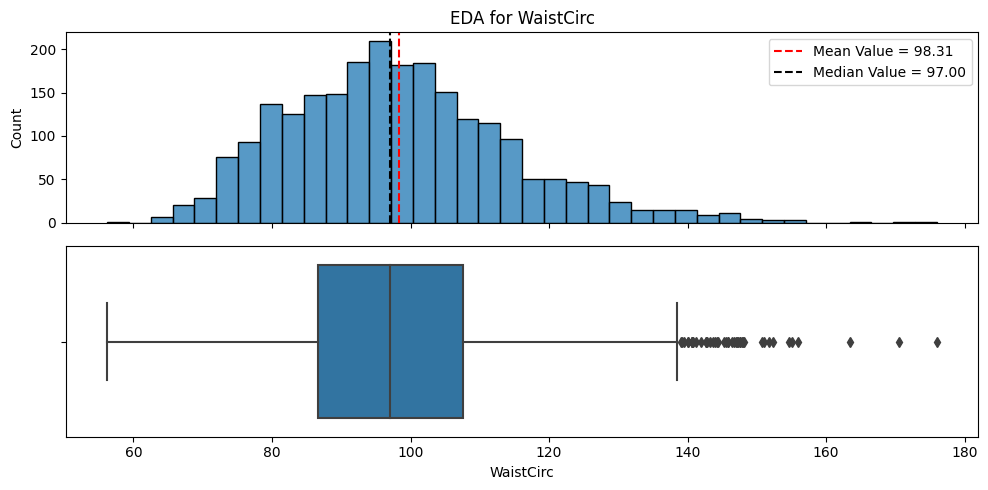

In [ ]:
plot_numeric(df,"WaistCirc")

The distrubution is almost normal, we will impute the missing value with the mean in this case.

In [ ]:
df['WaistCirc'].fillna(df['WaistCirc'].mean(), inplace = True)
df['WaistCirc'].isna().sum()

0

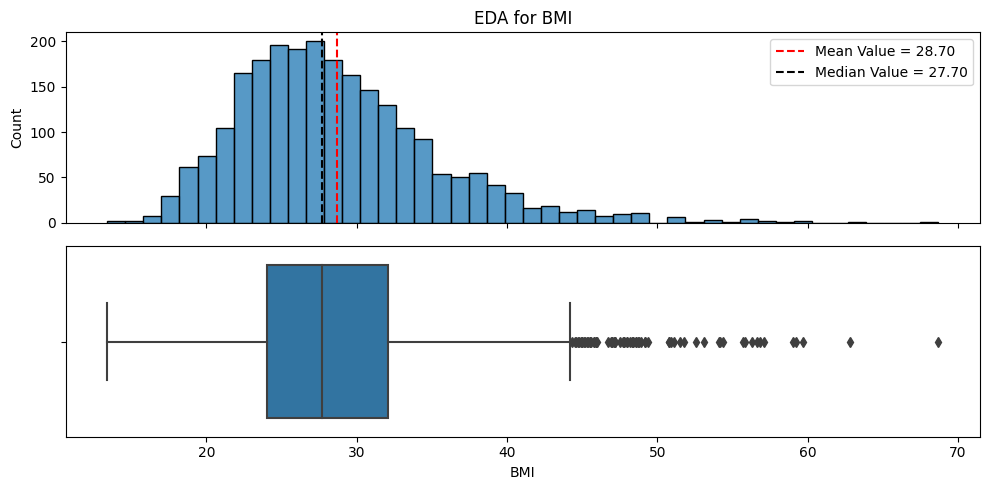

In [ ]:
plot_numeric(df,"BMI")

The distribution is slightly skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [ ]:
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['BMI'].isna().sum()

0

In [ ]:
df['Marital'].value_counts()

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

the most frequent category is Married. we will impute NaN value with it.

In [ ]:
df['Marital'].fillna('Married', inplace = True)
df['Marital'].isna().sum()

0

In [ ]:
df['Marital'].value_counts()

Married      1400
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

6. Check Target Balance:

In [ ]:
df['MetabolicSyndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

dataset fairly balanced.

# Exploratory Visuals:

Produced univariate visuals for the target and all features

1. Categorical columns:

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64


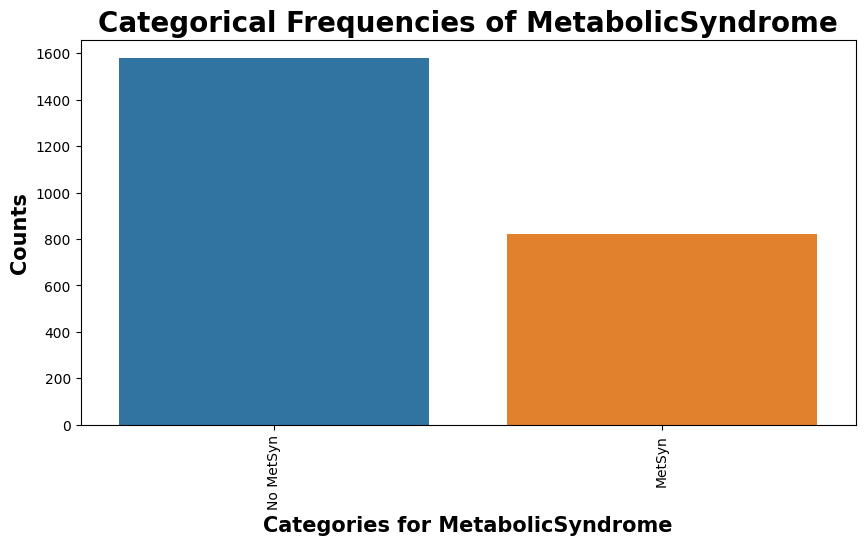

In [ ]:
fig, ax = plot_bar(df, 'MetabolicSyndrome', 'MetabolicSyndrome');
print(df['MetabolicSyndrome'].value_counts())

Female    1211
Male      1190
Name: Sex, dtype: int64


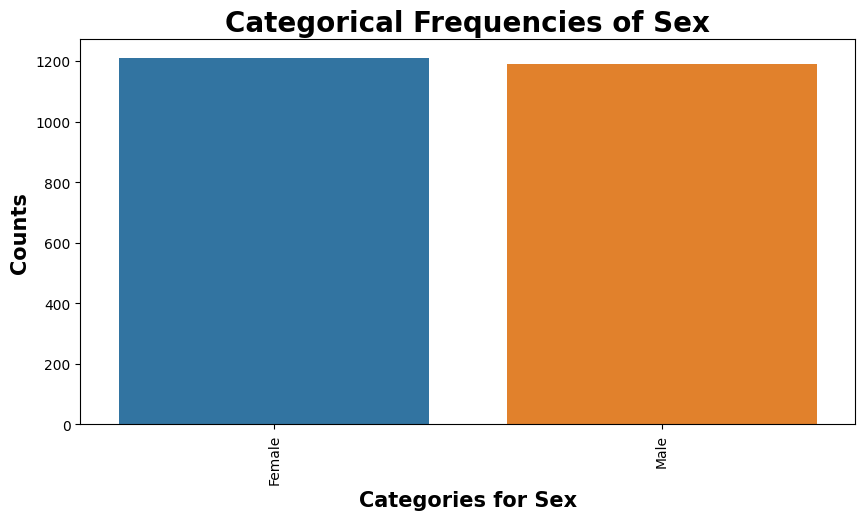

In [ ]:
fig, ax = plot_bar(df, 'Sex', 'Sex');
print(df['Sex'].value_counts())

Married      1400
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64


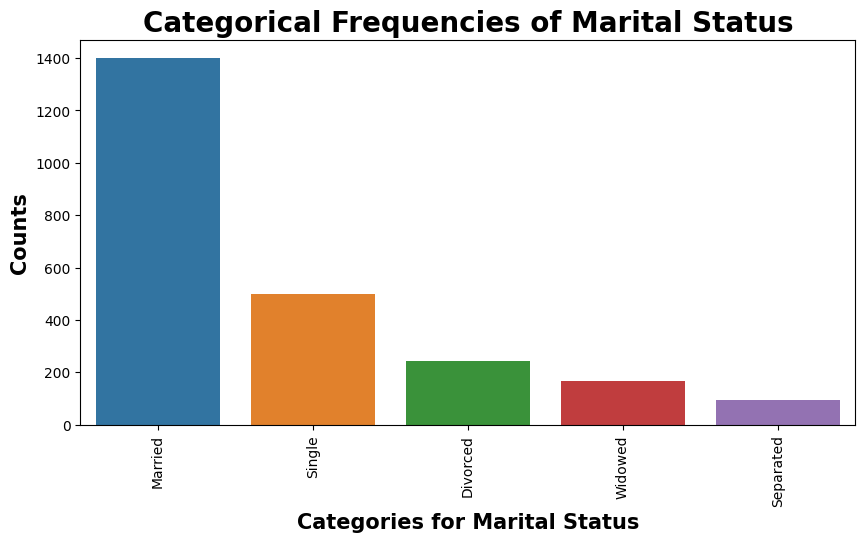

In [ ]:
fig, ax = plot_bar(df, 'Marital', 'Marital Status');
print(df['Marital'].value_counts())

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64


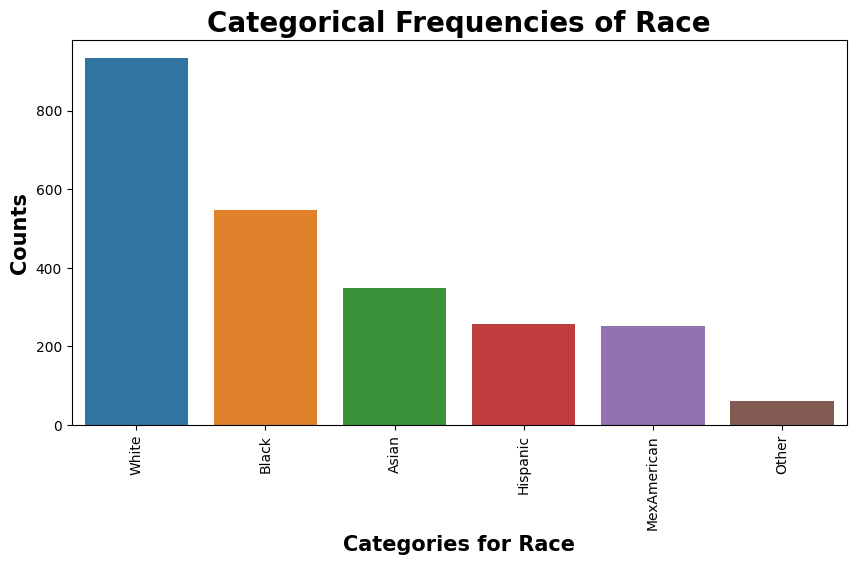

In [ ]:
fig, ax = plot_bar(df, 'Race', 'Race');
print(df['Race'].value_counts())

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64


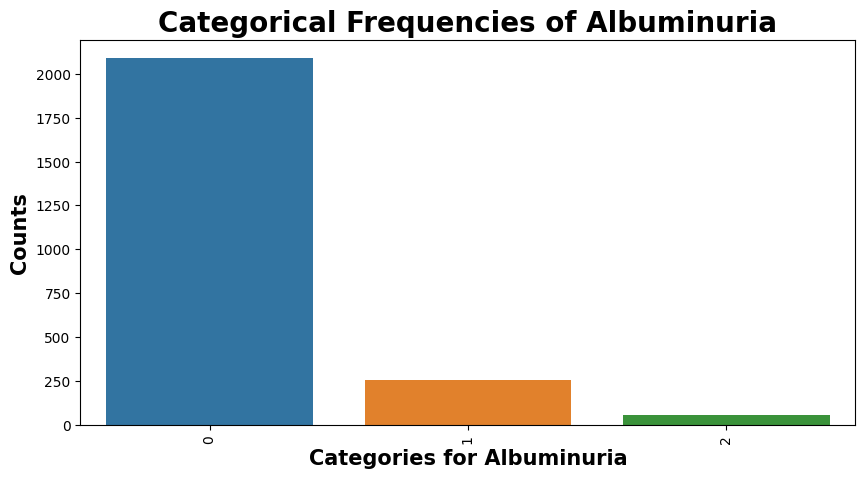

In [ ]:
fig, ax = plot_bar(df, 'Albuminuria', 'Albuminuria');
print(df['Albuminuria'].value_counts())

2. Numerical Columns:

In [ ]:
df.select_dtypes('number').columns

Index(['seqn', 'Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')

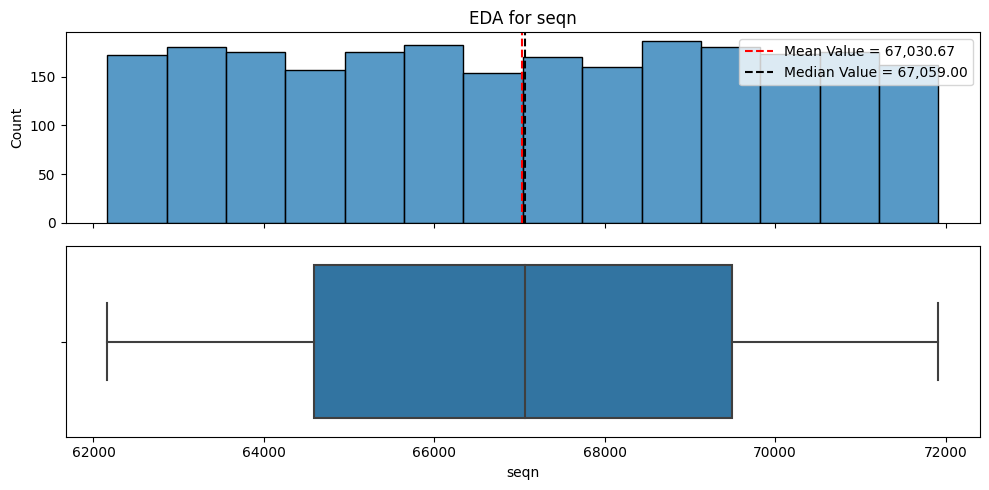

In [ ]:
plot_numeric(df,"seqn")

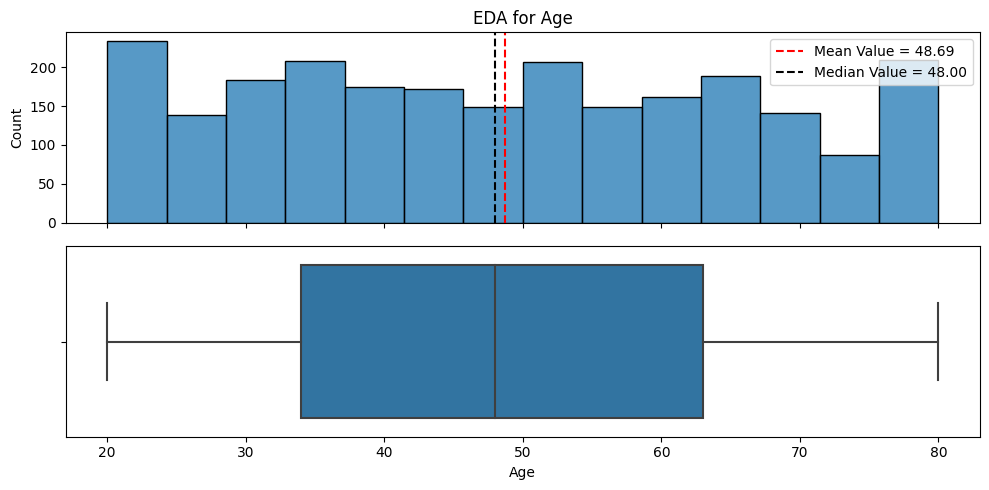

In [ ]:
plot_numeric(df,"Age")

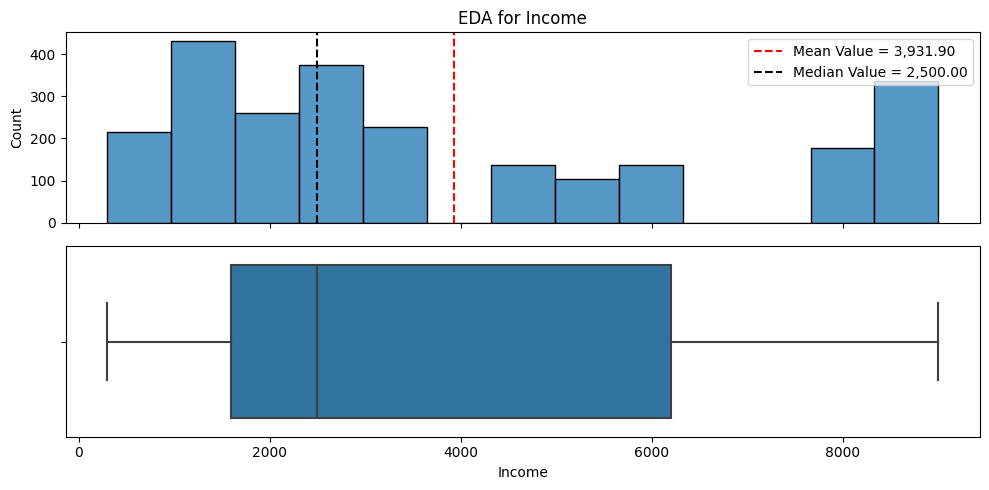

In [ ]:
plot_numeric(df,"Income")

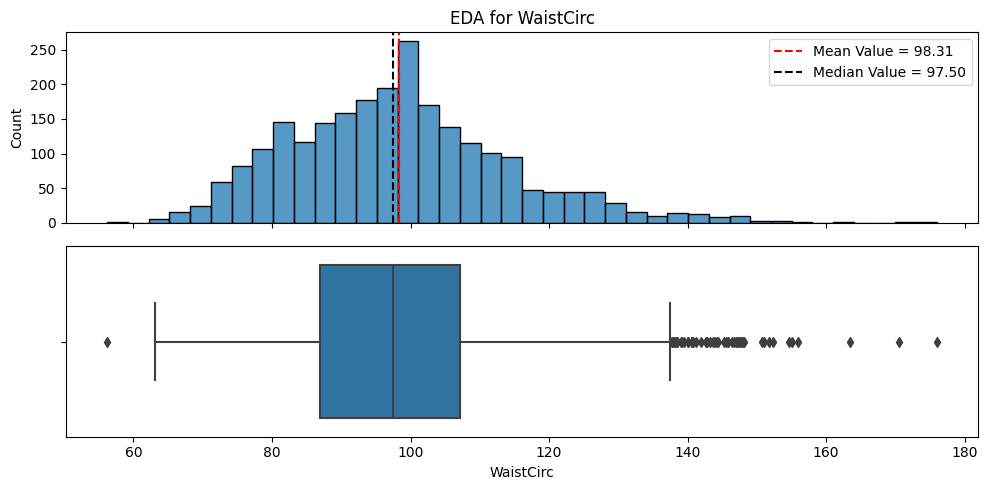

In [ ]:
plot_numeric(df,"WaistCirc")

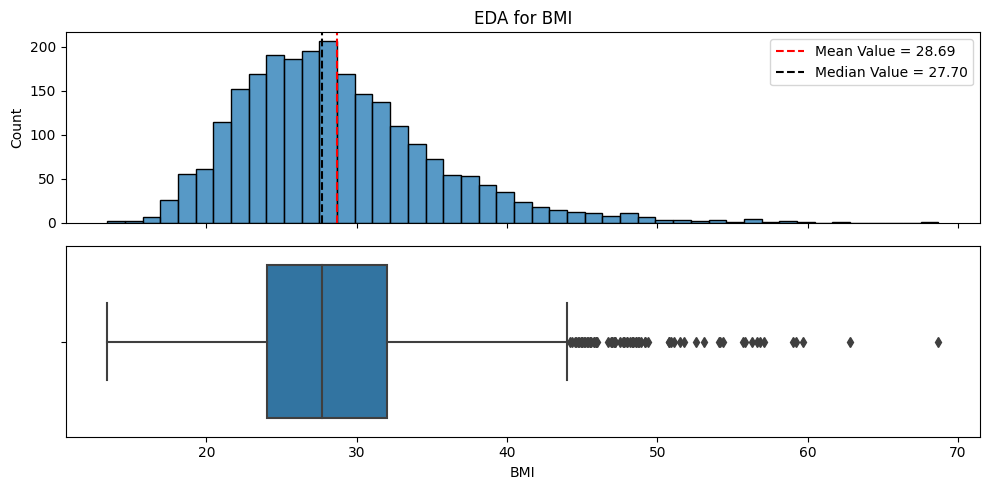

In [ ]:
plot_numeric(df,"BMI")

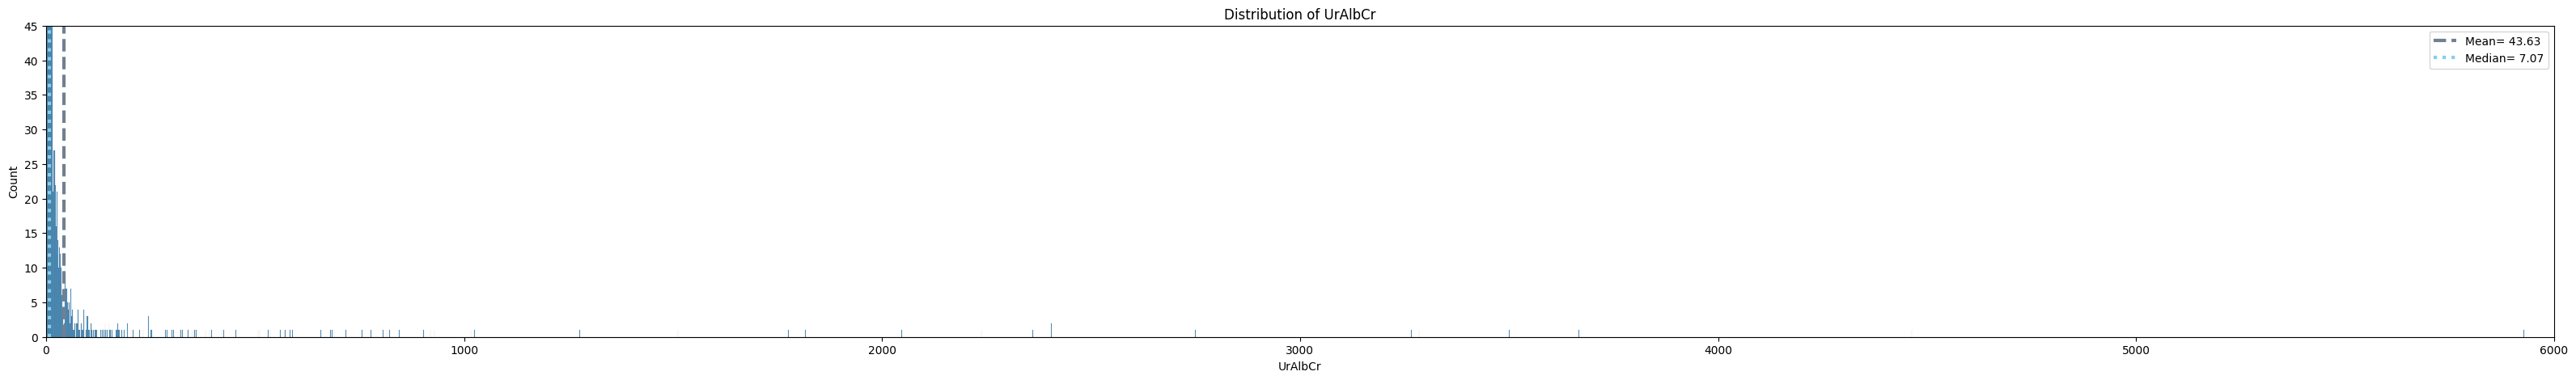

In [ ]:
fig, ax = plt.subplots(figsize=(40,5))

## Plot histogram
sns.histplot(data=df,x='UrAlbCr',ax=ax)
ax.set_title("Distribution of UrAlbCr");
ax.set_ylabel('Count')
ax.set_xlabel('UrAlbCr')
ax.set_xlim(left=0,right=6000)
ax.set_ylim(bottom=0,top=45)

  ## Annotating mean and median
mean_value = df['UrAlbCr'].mean()
ax.axvline(mean_value,color='slategray', ls='--', lw=3, label=f"Mean= {mean_value:,.2f}");

med_value = df['UrAlbCr'].median()
ax.axvline(med_value,color='skyblue', ls=':', lw=3, label=f"Median= {med_value:,.2f}");

ax.legend();

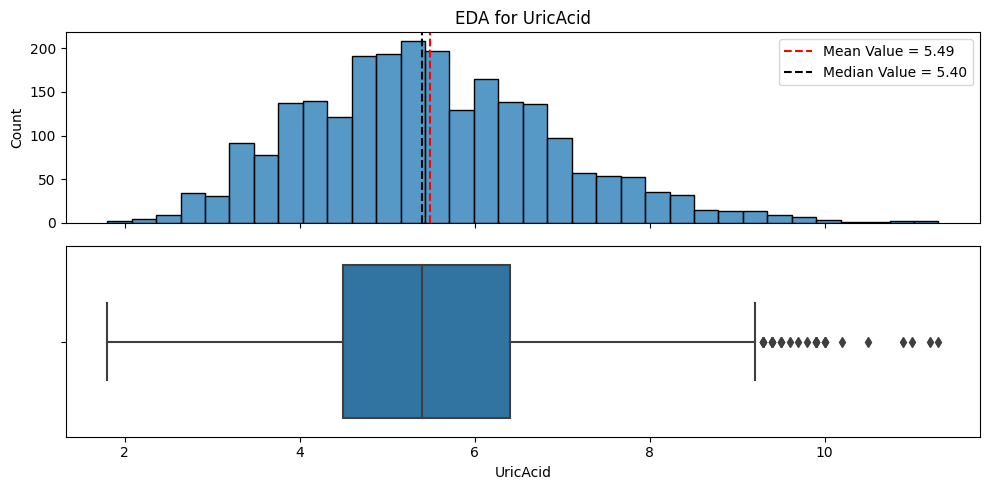

In [ ]:
plot_numeric(df,"UricAcid")

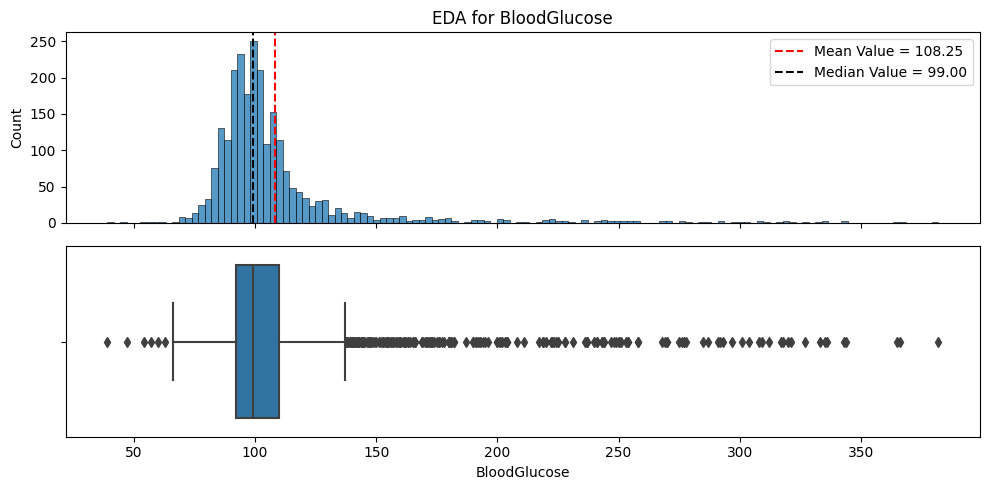

In [ ]:
plot_numeric(df,"BloodGlucose")

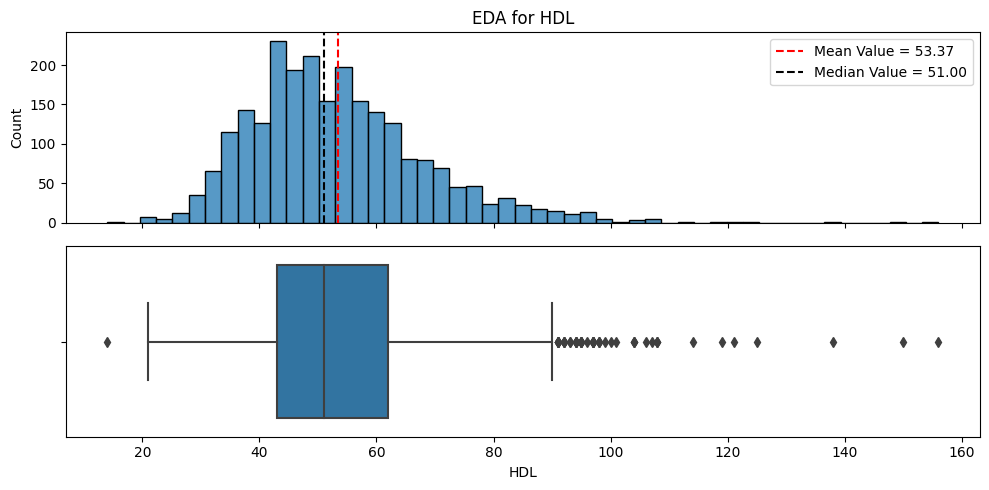

In [ ]:
plot_numeric(df,"HDL")

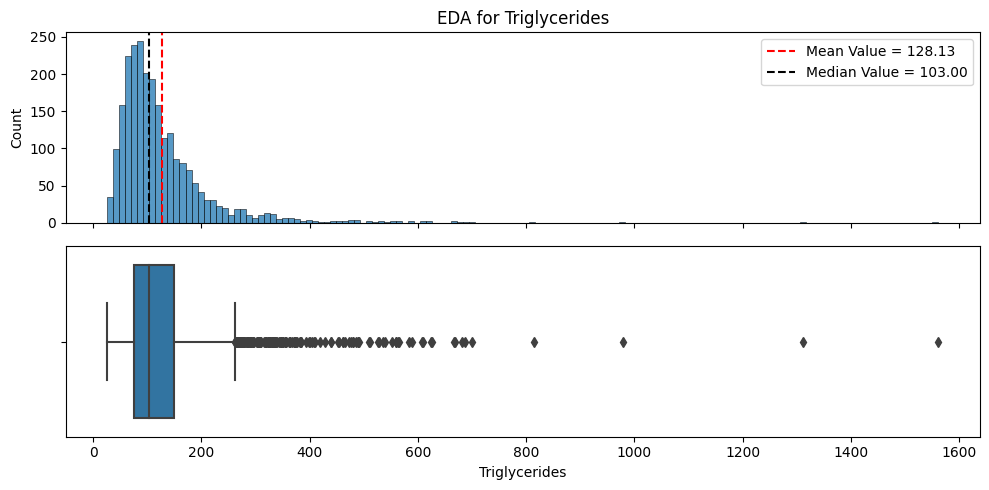

In [ ]:
plot_numeric(df,"Triglycerides")

In [ ]:
# Encode 'Drug' column
df['MetabolicSyndrome'] = df['MetabolicSyndrome'].replace({'No MetSyn': 0, 'MetSyn': 1})

<ipython-input-83-0ec4b8715d58>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('MetabolicSyndrome', axis=1).corrwith(df['MetabolicSyndrome']).plot(kind='bar', grid=True, figsize=(12, 8),title="Numerical Features Correlation with MetabolicSyndrome");


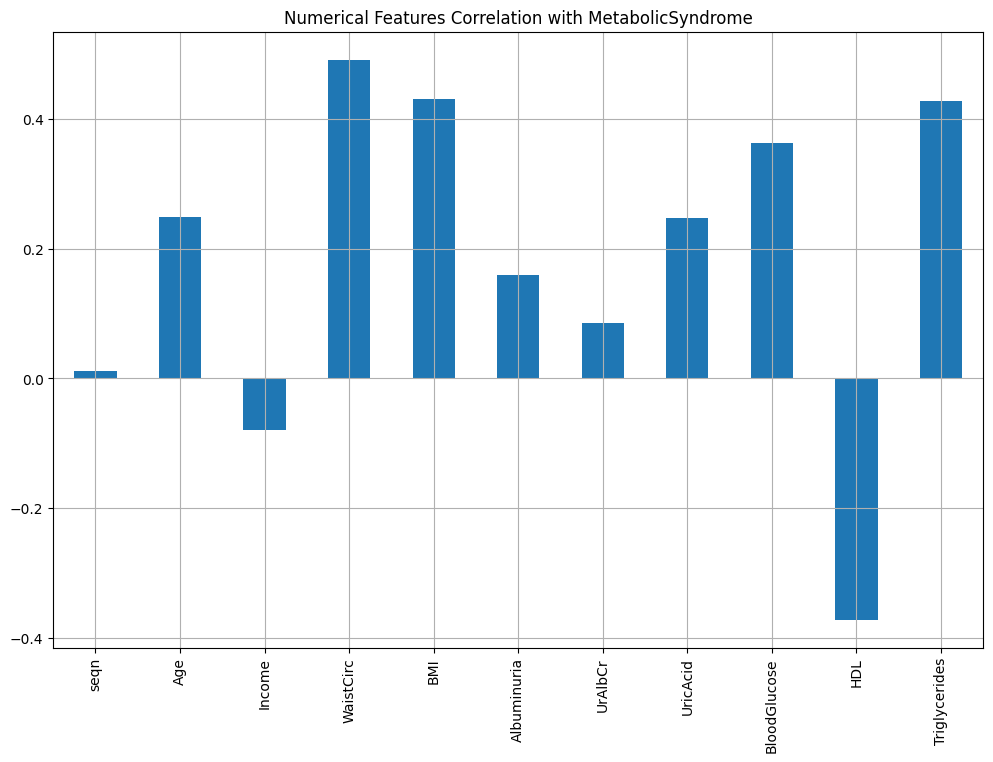

In [ ]:
df.drop('MetabolicSyndrome', axis=1).corrwith(df['MetabolicSyndrome']).plot(kind='bar', grid=True, figsize=(12, 8),title="Numerical Features Correlation with MetabolicSyndrome");